In [1]:
import os
import sys
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt

# Ajouter manuellement le chemin vers le dossier parent du projet
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(parent_dir)

from simulation.dispo import simulation_disp
from simulation.demand import simulation_demand
from source import recolte_sang
from politics.PFA import PFA
from evaluation import complete_sim_with_peremption,complete_sim_without_peremption
from test_bench import generate_instance

In [3]:
locations,N,K,Q,alpha = generate_instance(density="medium")
Q = 250

In [4]:
teta_low = [300]*12
teta_target = [600, 600, 600, 340, 340, 340, 340, 340, 340, 600, 600, 600]
#teta_target = [2500]*12
policy = "PFA"
p = -0.4
a = [0.5,0.5,0.5,p,p,p,p,p,p,p,0,0]
#a=[0]*12
t1 = []
t2 = []


In [43]:
teta_low = [300]*12
teta_target = [600, 600, 600, 340, 340, 340, 340, 340, 340, 600, 600, 600]
#teta_target = [2500]*12
policy = "PFA"
p = -0.4
a = [0.5,0.5,0.5,p,p,p,p,p,p,p,0,0]
#a=[0]*12
t1 = []
t2 = []

for k in range(10):

    final_cost,stock_history,recourse_count,peremption = complete_sim_with_peremption(teta_low, teta_target,locations,N,K,Q,alpha,policy,a,[0]*12)
    final_cost2,stock_history2,recourse_count2,peremption2 = complete_sim_with_peremption(teta_low, teta_target,locations,N,K,Q,alpha,"DL",a,[0]*12)
    t1.append(np.sum(final_cost))
    t2.append(np.sum(final_cost2))


print("Cout moyen PFA : ",np.mean(t1))
print("Cout moyen DL : ",np.mean(t2))

Cout moyen PFA :  582.6270240648096
Cout moyen DL :  557.4121570214924


In [60]:
final_cost,stock_history,recourse_count,peremption = complete_sim_with_peremption(teta_low, teta_target,locations,N,K,Q,alpha,policy,a,[0]*12)
final_cost2,stock_history2,recourse_count2,peremption2 = complete_sim_with_peremption(teta_low, teta_target,locations,N,K,Q,alpha,"DL",a,[0]*12)


Set parameter Username


Academic license - for non-commercial use only - expires 2025-11-10

Camion 1 utilisé :
  Parcours de 0 à 4 avec distance 7.81 et quantité collectée 0.00
  Parcours de 4 à 5 avec distance 4.24 et quantité collectée 155.00
  Parcours de 5 à 0 avec distance 3.61 et quantité collectée 80.00
Quantité totale collectée par le camion 1: 235.00

Camion 2 utilisé :
  Parcours de 0 à 1 avec distance 3.61 et quantité collectée 0.00
  Parcours de 1 à 0 avec distance 3.61 et quantité collectée 76.00
Quantité totale collectée par le camion 2: 76.00

Camion 3 utilisé :
  Parcours de 0 à 3 avec distance 4.12 et quantité collectée 0.00
  Parcours de 3 à 0 avec distance 4.12 et quantité collectée 200.00
Quantité totale collectée par le camion 3: 200.00

Quantité totale collectée par tous les camions : 511.00

Camion 1 utilisé :
  Parcours de 0 à 3 avec distance 4.12 et quantité collectée 0.00
  Parcours de 1 à 0 avec distance 3.61 et quantité collectée 76.00
  Parcours de 3 à 1 avec distance 1.41 et qua

TypeError: cannot unpack non-iterable NoneType object

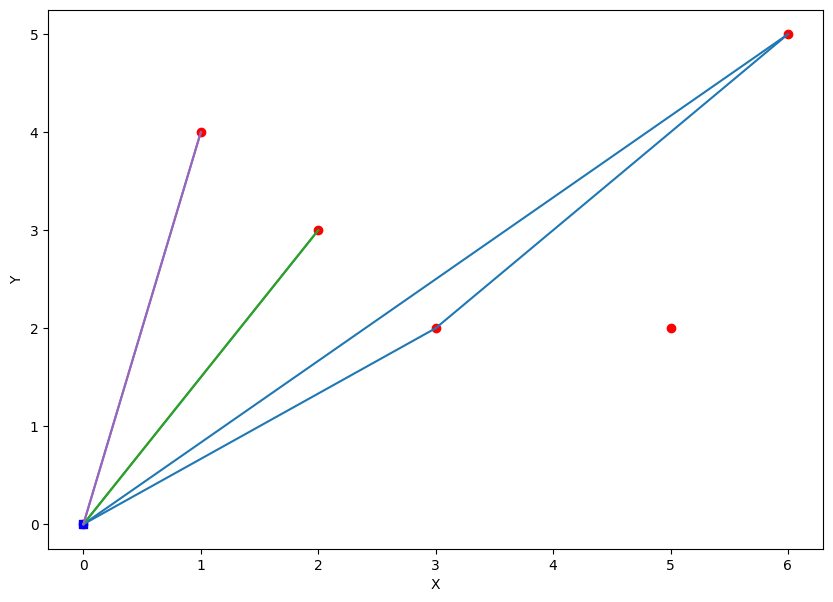

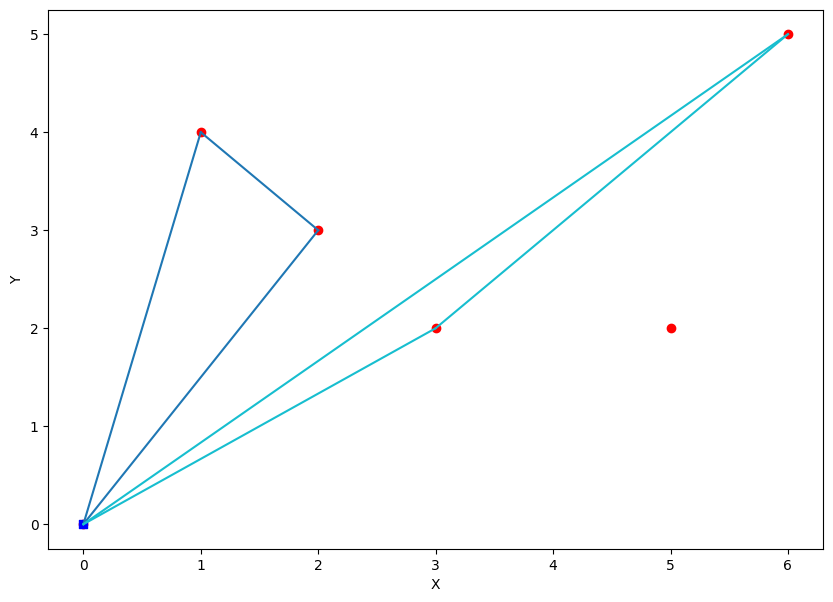

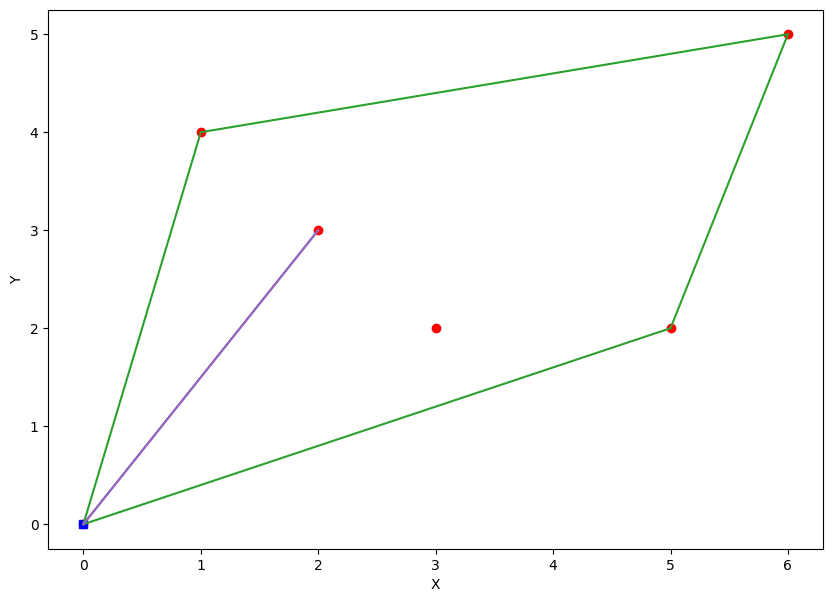

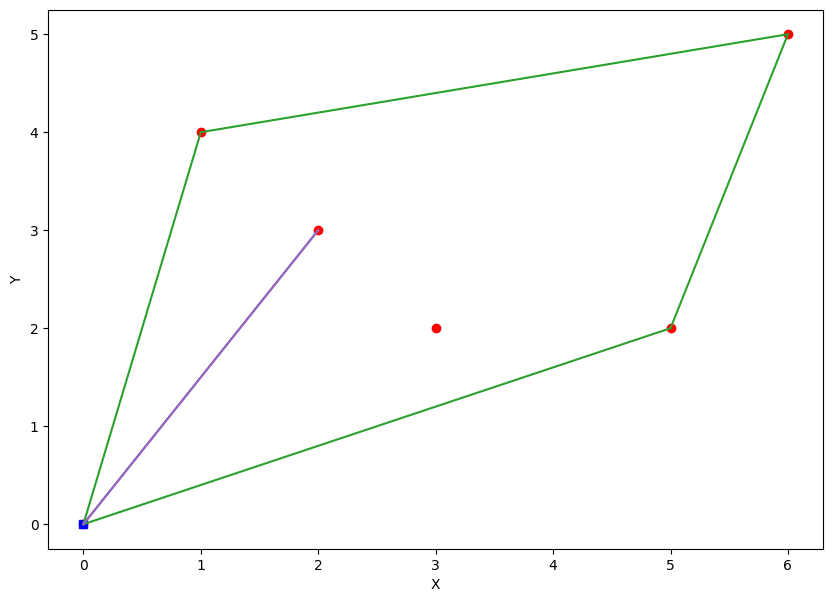

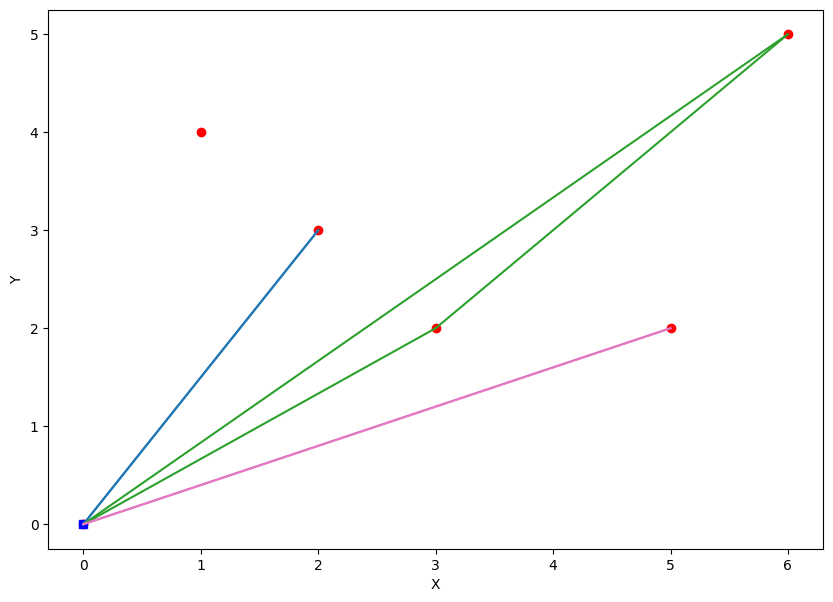

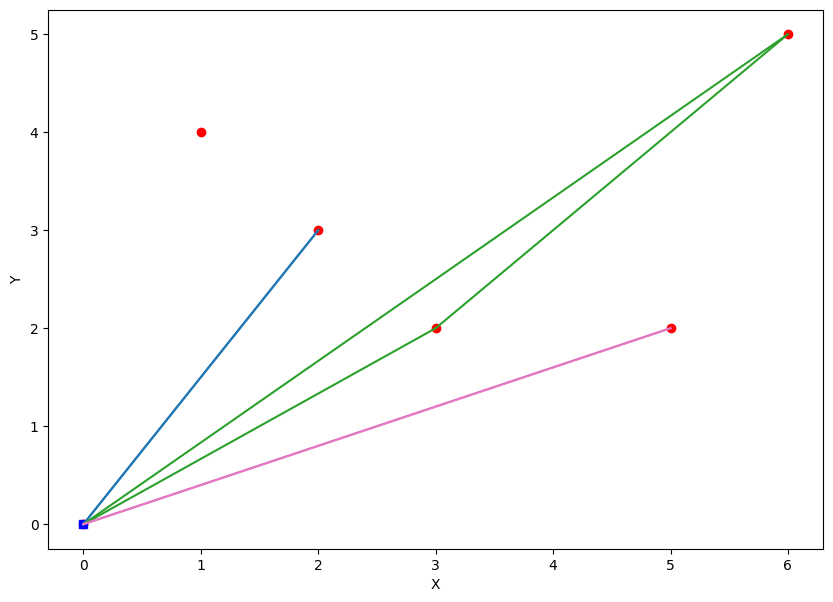

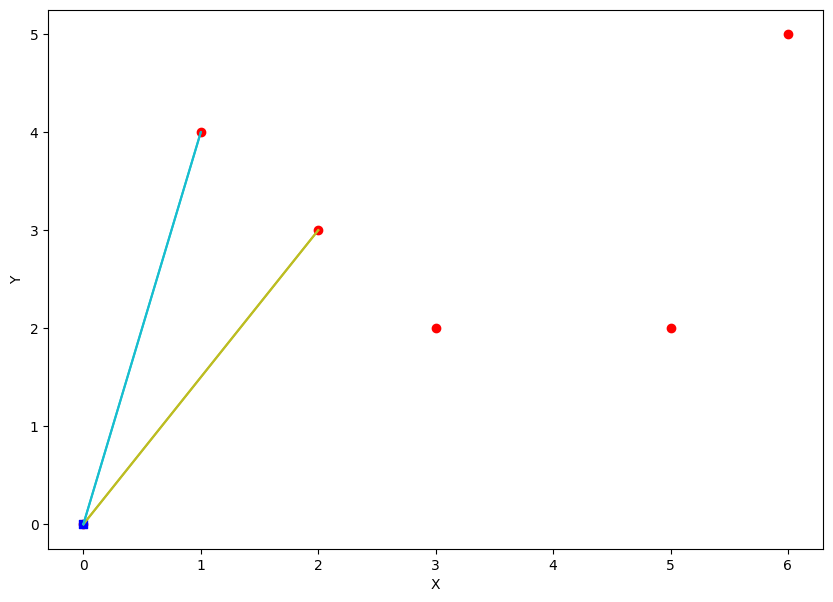

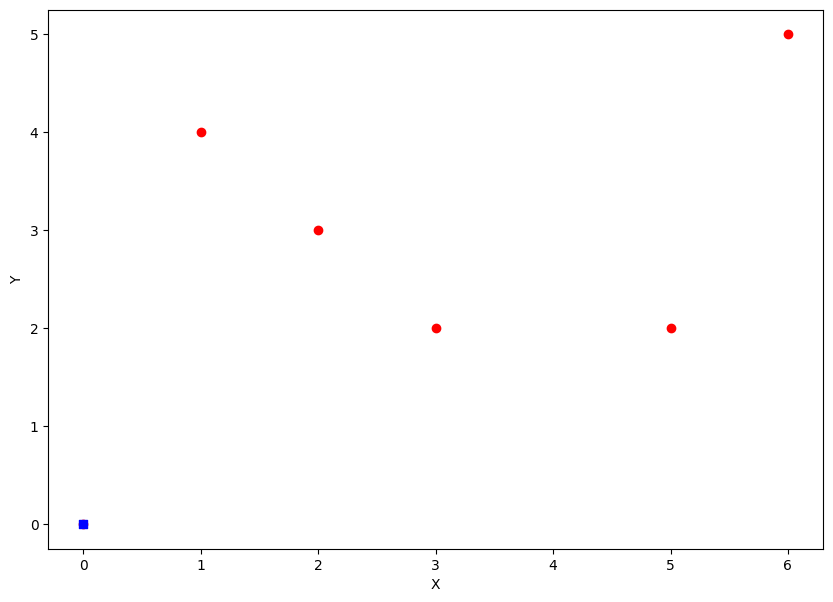

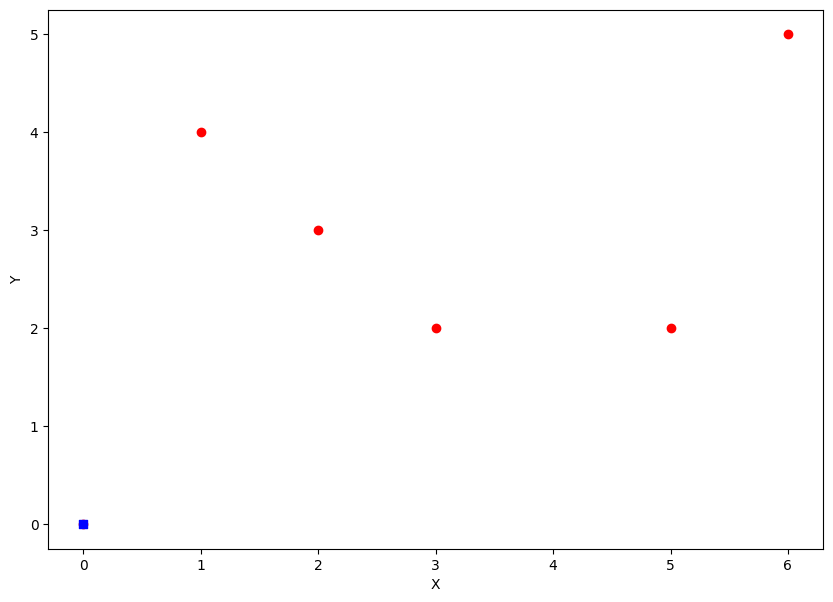

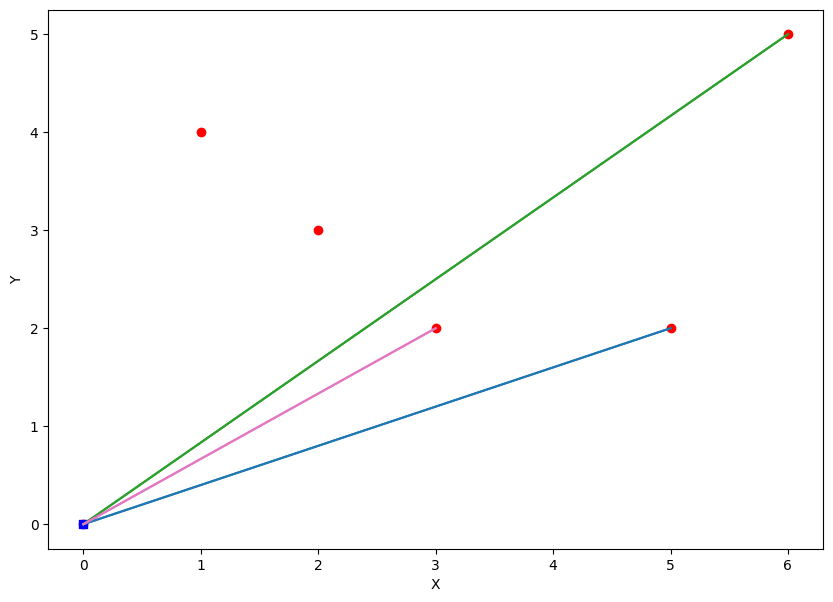

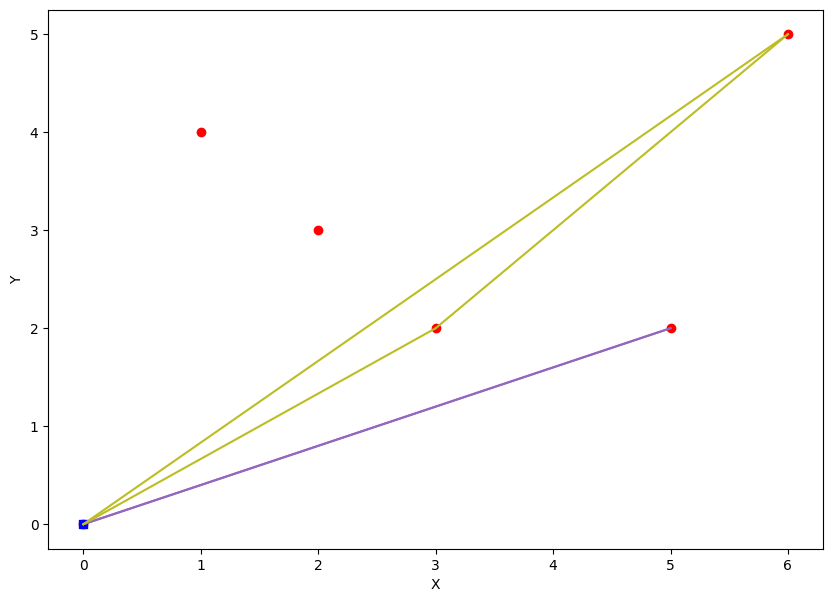

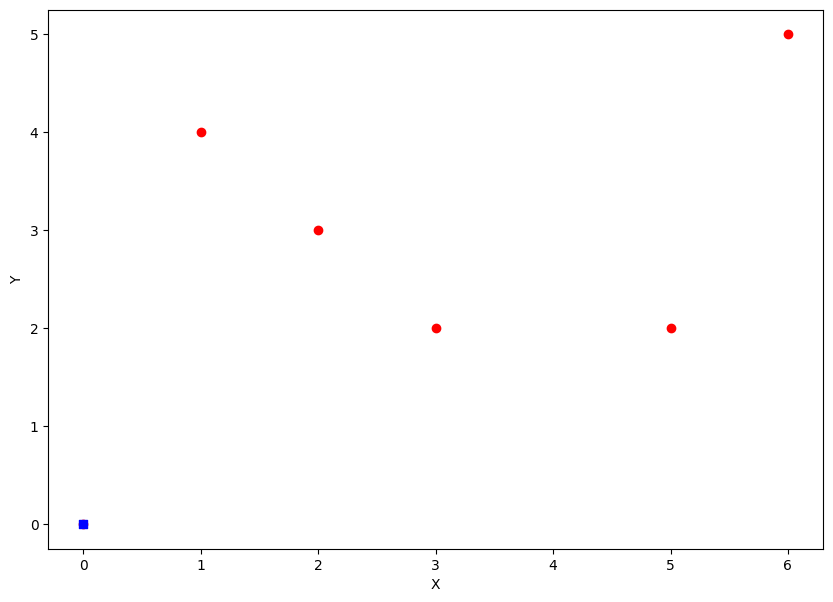

In [5]:
final_cost,stock_history,recourse_count,peremption = complete_sim_with_peremption(teta_low, teta_target,locations,N,K,Q,alpha,policy,a,[0]*12)


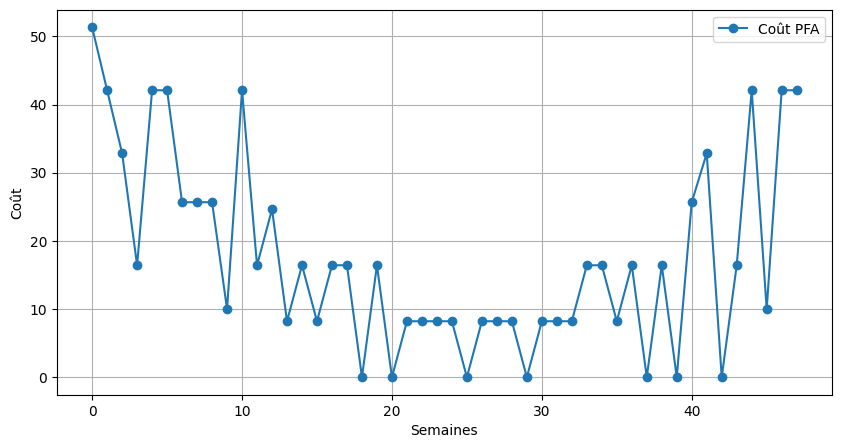

In [7]:
plt.figure(figsize=(10, 5))  

plt.plot(final_cost, marker='o', label='Coût PFA')
#plt.plot(final_cost2, marker='o', label='Coût Lookahead')

plt.xlabel("Semaines")  # Légende pour l'axe X
plt.ylabel("Coût")  # Légende pour l'axe Y

plt.legend(loc='best')  # Légende placée automatiquement au meilleur endroit
plt.grid()  # Affiche une grille pour mieux visualiser
plt.show()


In [46]:
# Indices
a, b = 17, 37

# Appliquer la modification sur la tranche
stock_history2[a:b + 1] = [x - 380 for x in stock_history2[a:b + 1]]

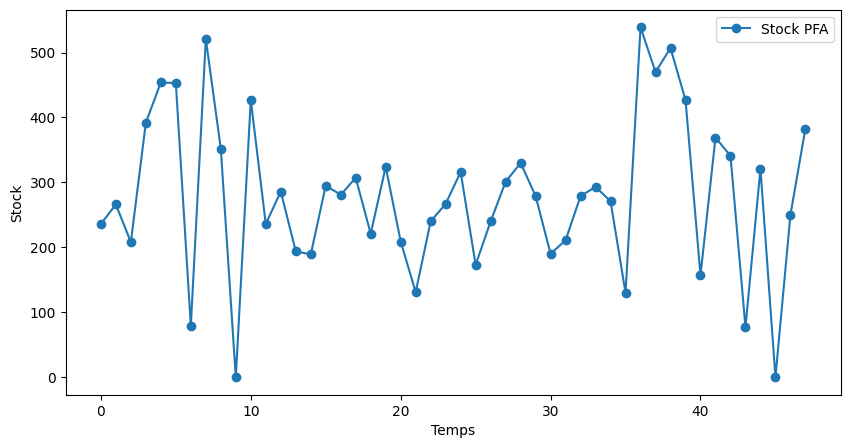

In [6]:
plt.figure(figsize=(10, 5))  
plt.plot(stock_history, marker='o', label="Stock PFA") 
#plt.plot(stock_history2, marker='o', label="Stock Lookahead") 

plt.xlabel("Temps")
plt.ylabel("Stock")
plt.legend()
plt.show()

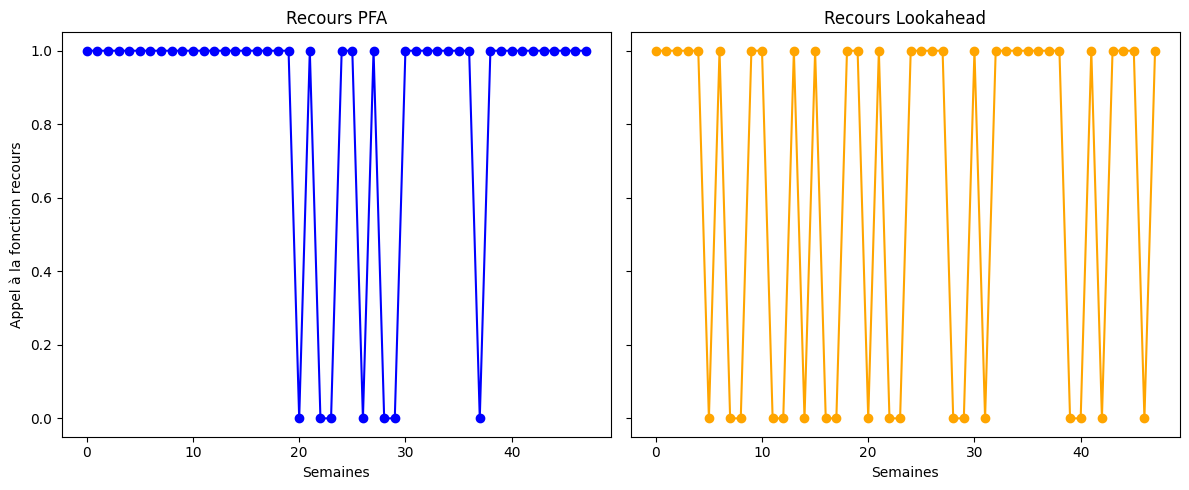

In [56]:
import matplotlib.pyplot as plt


# Création des sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Premier graphique : Recours PFA
axes[0].plot(recourse_count, marker='o', label="Recours PFA", color="blue")
axes[0].set_title("Recours PFA")
axes[0].set_xlabel("Semaines")
axes[0].set_ylabel("Appel à la fonction recours")

# Deuxième graphique : Recours Lookahead
axes[1].plot(recourse_count2, marker='o', label="Recours Lookahead", color="orange")
axes[1].set_title("Recours Lookahead")
axes[1].set_xlabel("Semaines")

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

# Affichage
plt.show()


In [13]:
len(recourse_count)

48

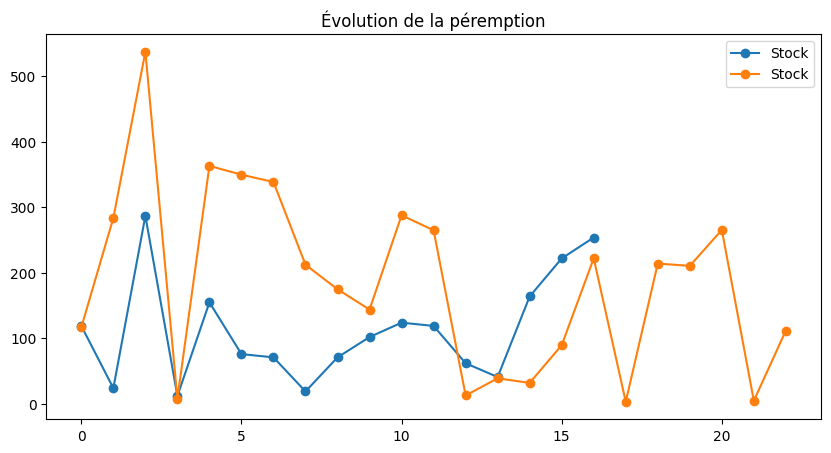

In [ ]:
plt.figure(figsize=(10, 5)) 
plt.title("Évolution de la péremption")

plt.plot(peremption, marker='o', label="Stock") 
plt.plot(peremption2, marker='o', label="Stock") 
